In [1]:
import pandas as pd
import numpy as np
from numpy.random import rand, randint, randn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv', parse_dates=['datetime'], index_col=0, engine='python')
df_test = pd.read_csv('test.csv', parse_dates=['datetime'], index_col=0, engine='python')

In [3]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df_train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [5]:
df_train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [6]:
df_train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

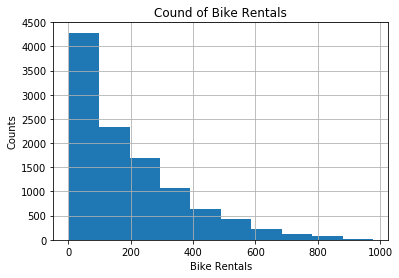

In [7]:
plt.hist(df_train['count'])
plt.grid()
plt.xlabel('Bike Rentals')
plt.ylabel('Counts')
plt.title('Cound of Bike Rentals')
plt.show()

In [8]:
# break date time stamp in invidual year, month, day , hour values
def add_feature(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['second'] = df.index.second
    
add_feature(df_train)
add_feature(df_test)

In [9]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


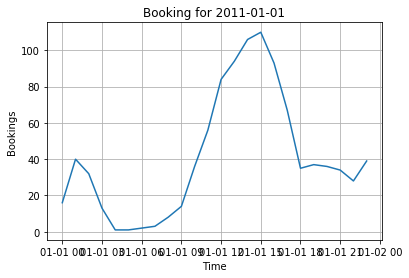

In [10]:
# Plot rentals for one day
plt.plot(df_train['2011-01-01']['count'])
plt.grid()
plt.xlabel('Time')
plt.ylabel('Bookings')
plt.title('Booking for 2011-01-01')
plt.show()

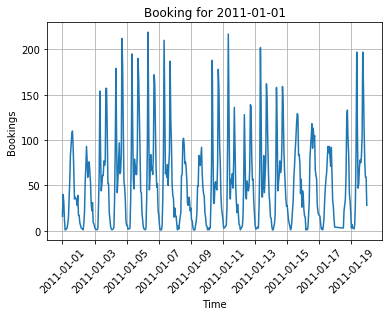

In [11]:
# Plot rentals for one month
plt.plot(df_train['2011-01']['count'])
plt.grid()
plt.xticks(fontsize=10, rotation=45)
plt.xlabel('Time')
plt.ylabel('Bookings')
plt.title('Booking for 2011-01-01')
plt.show()

In [12]:
group_hour = df_train.groupby(['hour'])
avg_by_hour = group_hour['count'].mean()

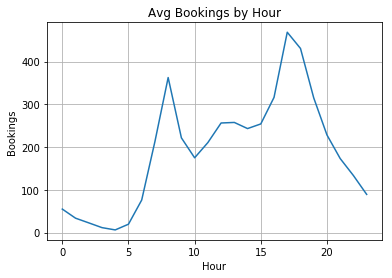

In [13]:
# Plot rentals by hours
plt.plot(avg_by_hour)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Bookings')
plt.title('Avg Bookings by Hour')
plt.show()

In [14]:
group_month = df_train.groupby(['month'])
avg_by_month = group_month['count'].mean()
max_by_month = group_month['count'].max()

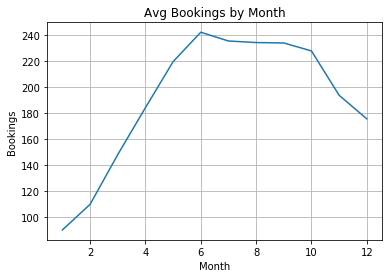

In [15]:
# Plot rentals by months
plt.plot(avg_by_month)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Bookings')
plt.title('Avg Bookings by Month')
plt.show()

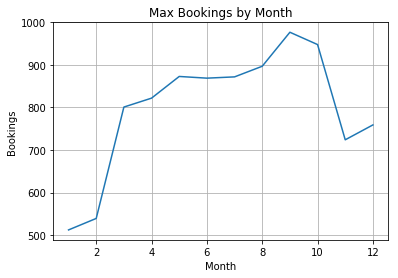

In [16]:
# Plot rentals by months
plt.plot(max_by_month)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Bookings')
plt.title('Max Bookings by Month')
plt.show()

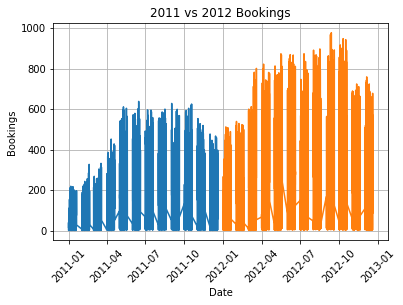

In [17]:
# Compare rentals for 2011 and 2012
plt.plot(df_train['2011']['count'])
plt.plot(df_train['2012']['count'])
plt.grid()
plt.xticks(fontsize=10, rotation=45)
plt.xlabel('Date')
plt.ylabel('Bookings')
plt.title('2011 vs 2012 Bookings')
plt.show()

In [18]:
df_train.corr()['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
minute             NaN
second             NaN
Name: count, dtype: float64

## Persist the new Training & Testing Dataset

In [19]:
df_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [19]:
column_names = ['count','season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year',
       'month', 'day', 'hour', 'minute', 'second']

In [20]:
# split data into testing and training
num_samples = df_train.shape[0]
train_percentile = np.int(np.round(num_samples*.80))
val_percentile = np.int(np.round(num_samples*.20))

df_train_f = df_train[0:train_percentile]
df_val_f = df_train[train_percentile:train_percentile+val_percentile]

In [21]:
# persist individual files
df_train_f.to_csv('bike_rental_train.csv', index=False, header=False, columns=column_names)
df_val_f.to_csv('bike_rental_val.csv', index=False, header=False, columns=column_names)
df_test.to_csv('bike_rental_test.csv')